# Amazon Product Ratings & Review EDA
Description: This project explores Amazon product data — including product details, prices, ratings, and customer reviews — to uncover insights about consumer behavior and product performance. The dataset contains information such as product ID, name, category, discounted and actual prices, ratings, number of reviews, review text, and user information.

Background: Customer reviews and pricing strategies play a major role in how products perform on e-commerce platforms. By analyzing this data, we can better understand how discounts, ratings, and customer sentiment influence sales and product success.

Project Objective: The goal of this exploratory analysis is to identify patterns in pricing and discounting, compare performance across categories, and explore the relationship between customer reviews and overall product ratings.

### Steps
Data Cleaning – Loaded the Amazon product dataset, inspected the schema, and handled missing or inconsistent values to prepare for analysis.

Data Wrangling – Standardized currency and percentage columns, engineered helper fields such as discount amount, price ratio, and review length, and created summary statistics for key variables.

Data Visualization – Built visualizations to explore pricing distributions, category performance, discount patterns, and how reviews and ratings relate to each other.

Model Building – Trained and evaluated baseline and Random Forest models to predict product ratings using features like price, discount percentage, review volume, and text sentiment

In [91]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [92]:
# Importing technologies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Visualization aesthetics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 140)
pd.set_option('display.float_format', '{:,.2f}'.format)

sns.set_theme(style='whitegrid', context='talk', palette='deep')
%matplotlib inline

## Data Cleaning
Loaded the Amazon product dataset, inspected the schema, and handled missing or inconsistent values to prepare for analysis.

In [93]:
raw_df = pd.read_csv('amazon.csv')
raw_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, M...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOC...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a goo...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Techno...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop ...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHC...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6TO2CCA,R3PHKXYA5AFEOU","A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good qua...",I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well mad...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY445_SX342_QL70_FMwebp_.jpg,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6PVG/ref=sr_1_2?qid=1672909124&s=electronics&sr=1-2
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote maximum signal quality and strength and ...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay gupta","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK0TR,R207CYDCHJJTCJ,R3PCU8XMU173BT,R1IMONDOWRNU5V","Good speed for earlier versions,Good Product,Working good,Good for the price,Good,Worth for money,Working nice,it's a really nice product","Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggrbUCL._SY88.jpg,Working good,https://m.me...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/31IvNJZnmdL._SY445_SX342_QL70_FMwebp_.jpg,https://www.amazon.in/Sounce-iPhone-Charging-Compatible-Devices/dp/B096MSW6CT/ref=sr_1_3?qid=1672909124&s=electronics&sr=1-3
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 

In [94]:
# Getting a short example value from each column
# First row of every dataset and shorten long texts
example_values = (
    raw_df.iloc[0]
    .astype(str)
    .apply(lambda x: x[:70] + ('...' if len(x) > 70 else ''))
)

# Make a summary table for all columns
column_overview = (
    pd.DataFrame({
        'dtype': raw_df.dtypes,
        'non_null': raw_df.notna().sum(),
        'unique': raw_df.nunique(),
        'example': example_values
    })
    .sort_index()
)
column_overview

,dtype,non_null,unique,example
about_product,object,1465,1293,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone..."
actual_price,object,1465,449,"₹1,099"
category,object,1465,211,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cable...
discount_percentage,object,1465,92,64%
discounted_price,object,1465,550,₹399
img_link,object,1465,1412,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQN...
product_id,object,1465,1351,B07JW9H4J1
product_link,object,1465,1465,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9...
product_name,object,1465,1337,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cabl...
rating,object,1465,28,4.2


In [95]:
# Make a summary table of missing values for each column
missing = (
    raw_df.isna().sum()
    .to_frame('missing_count')
    .assign(missing_percent=lambda x: (x['missing_count'] / len(raw_df)) * 100)
    .query('missing_count > 0')
    .sort_values('missing_percent', ascending=False)
)
missing

,missing_count,missing_percent
rating_count,2,0.14


## Data Wrangling
Standardized currency and percentage columns, engineered helper fields such as discount amount, price ratio, and review length, and created summary statistics for key variables.

In [96]:
# Helper function to remove currency signs and commas
def clean_currency(series):
    return pd.to_numeric(
        series.astype(str)
        .str.replace(r'[₹,]', '', regex=True)
        .str.strip(),
        errors='coerce'
    )

# Helper function to remove % signs and converts from text to numeric
def clean_percent(series):
    return pd.to_numeric(
        series.astype(str)
        .str.replace('%', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip(),
        errors='coerce'
    )

In [97]:
# Making a copy of the original dataset
df = raw_df.copy()

# Clean price and discount columns
df['discounted_price'] = clean_currency(df['discounted_price'])
df['actual_price'] = clean_currency(df['actual_price'])
df['discount_pct'] = clean_percent(df['discount_percentage'])

In [98]:
# Fix review and rating columns
# Turns values into floats and removes commas
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(
    df['rating_count'].astype(str).str.replace(',', ''),
    errors='coerce'
)
df['log_rating_count'] = np.log1p(df['rating_count'])

In [99]:
# Clean category columns that have multiple subcategories or have unknown category
category_series = df['category'].fillna('')
df['primary_category'] = category_series.str.split('|').str[0].replace('', 'Unknown')
df['num_subcategories'] = np.where(
    category_series == '',
    0,
    category_series.str.count(r'\|') + 1
)

In [100]:
# How much prices were reduced by and ratios
# Removes invalid results
df['discount_amount'] = df['actual_price'] - df['discounted_price']
df['price_ratio'] = df['discounted_price'] / df['actual_price']
df.loc[~np.isfinite(df['price_ratio']), 'price_ratio'] = np.nan

In [101]:
# Measures how long product descriptions and reviews are (in characters and words)
# Useful for analyzing writing patterns and review detail level
df['about_length'] = df['about_product'].fillna('').str.len()
df['review_length'] = df['review_content'].fillna('').str.len()
df['review_word_count'] = (
    df['review_content']
    .fillna('')
    .str.split()
    .apply(len)
)

In [102]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_pct,log_rating_count,primary_category,num_subcategories,discount_amount,price_ratio,about_length,review_length,review_word_count
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, M...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.00,"1,099.00",64%,4.20,"24,269.00","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOC...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a goo...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1,64,10.10,Computers&Accessories,5,700.00,0.36,960,483,60
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Techno...",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.00,349.00,43%,4.00,"43,994.00","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop ...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHC...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6TO2CCA,R3PHKXYA5AFEOU","A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good qua...",I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well mad...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY445_SX342_QL70_FMwebp_.jpg,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6PVG/ref=sr_1_2?qid=1672909124&s=electronics&sr=1-2,43,10.69,Computers&Accessories,5,150.00,0.57,605,1186,201
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.00,"1,899.00",90%,3.90,"7,928.00",【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote maximum signal quality and strength and ...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay gupta","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK0TR,R207CYDCHJJTCJ,R3PCU8XMU173BT,R1IMONDOWRNU5V","Good speed for earlier versions,Good Product,Working good,Good for the price,Good,Worth for money,Working nice,it's a really nice product","Not quite durable and sturdy,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/71rIggrbUCL._SY88.jpg,Working good,https://

In [103]:
# Creates basic summary statistics for all the numerical columns
numeric_cols = [
    'discounted_price', 'actual_price', 'discount_pct',
    'discount_amount', 'price_ratio', 'rating',
    'rating_count', 'log_rating_count', 'review_word_count'
]
summary_stats = df[numeric_cols].describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
discounted_price,"1,465.00","3,125.31","6,944.30",39.00,325.00,799.00,"1,999.00","77,990.00"
actual_price,"1,465.00","5,444.99","10,874.83",39.00,800.00,"1,650.00","4,295.00","139,900.00"
discount_pct,"1,465.00",47.69,21.64,0.00,32.00,50.00,63.00,94.00
discount_amount,"1,465.00","2,319.68","4,604.47",0.00,371.00,800.00,"1,953.00","61,910.00"
price_ratio,"1,465.00",0.52,0.22,0.06,0.37,0.50,0.68,1.00
rating,"1,464.00",4.10,0.29,2.00,4.00,4.10,4.30,5.00
rating_count,"1,463.00","18,295.54","42,753.86",2.00,"1,186.00","5,179.00","17,336.50","426,973.00"
log_rating_count,"1,463.00",8.30,2.03,1.10,7.08,8.55,9.76,12.96
review_word_count,"1,465.00",240.77,316.61,11.00,81.00,139.00,243.00,"2,974.00"


In [104]:
# Calculates various insights to summarize dataset
key_metrics = {
    'row_count': len(df),
    'avg_rating': df['rating'].mean(),
    'median_discount_pct': df['discount_pct'].median(),
    'median_price_ratio': df['price_ratio'].median(),
    'median_rating_count': df['rating_count'].median(),
    'top_category': df['primary_category'].mode()[0],
    'top_category_count': df['primary_category'].value_counts().iloc[0]
}
pd.Series(key_metrics, name='value').to_frame()

,value
row_count,1465
avg_rating,4.10
median_discount_pct,50.00
median_price_ratio,0.50
median_rating_count,"5,179.00"
top_category,Electronics
top_category_count,526


In [105]:
# Groups products by their primary category and calculates key metrics
category_summary = (
    df.groupby('primary_category')
    .agg(
        product_count=('product_id', 'count'),
        avg_rating=('rating', 'mean'),
        median_discount_pct=('discount_pct', 'median'),
        median_price=('discounted_price', 'median'),
        median_rating_count=('rating_count', 'median')
    )
    .sort_values('product_count', ascending=False)
    .head(10)
    .round({'avg_rating': 2, 'median_discount_pct': 1, 'median_price': 0, 'median_rating_count': 0})
)
category_summary

,product_count,avg_rating,median_discount_pct,median_price,median_rating_count
primary_category,,,,,
Electronics,526,4.08,54.00,"1,399.00","10,689.00"
Computers&Accessories,453,4.15,58.00,349.00,"7,732.00"
Home&Kitchen,448,4.04,41.50,"1,199.00","2,306.00"
OfficeProducts,31,4.31,5.00,178.00,"4,426.00"
HomeImprovement,2,4.25,57.50,337.00,"4,283.00"
MusicalInstruments,2,3.90,46.00,638.00,"44,441.00"
Car&Motorbike,1,3.80,42.00,"2,339.00","1,118.00"
Health&PersonalCare,1,4.00,53.00,899.00,"3,663.00"
Toys&Games,1,4.30,0.00,150.00,"15,867.00"


## Data Visualization
Built visualizations to explore pricing distributions, category performance, discount patterns, and how reviews and ratings relate to each other.

/var/folders/h_/64jpn2v13lq3gb3zqqvjrw940000gn/T/ipykernel_3718/889925940.py:34: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/nataliewijaya/venvs/vscode/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/nataliewijaya/venvs/vscode/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


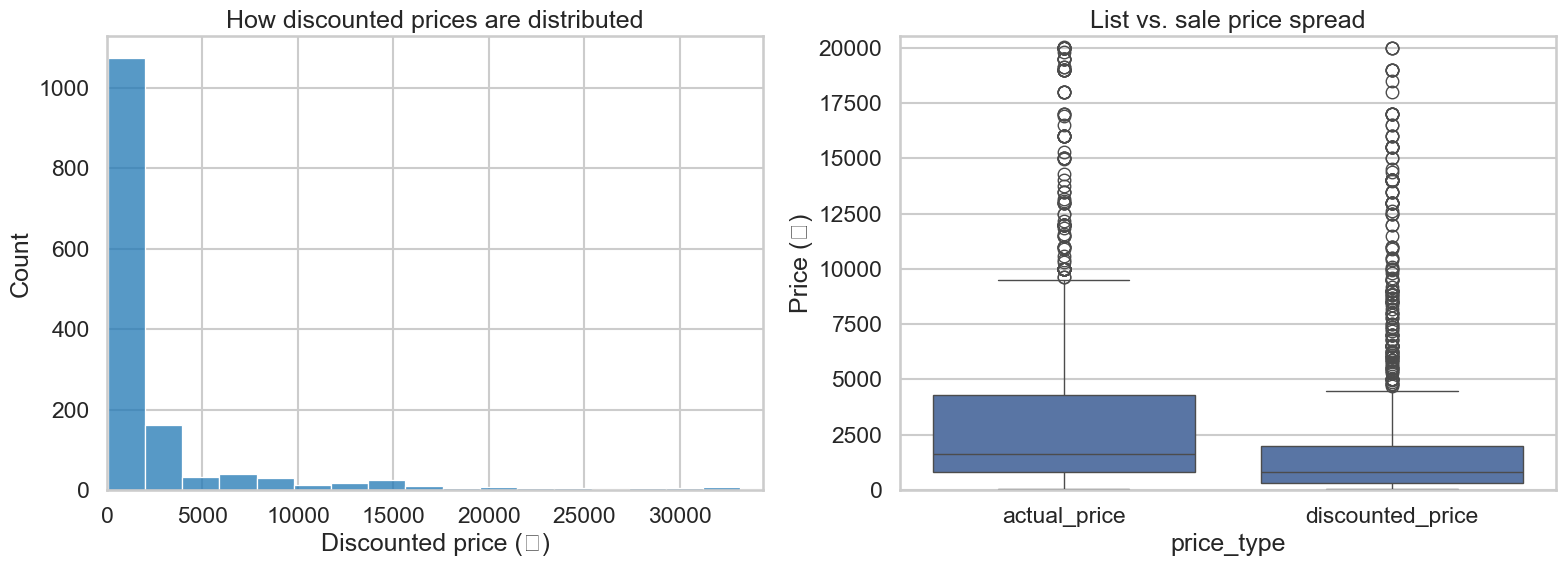

In [106]:
# Price Distribution Visualizations
# Compares the difference in actual and discounted prices.
# Helps identify pricing trends, outliers, and frequency of discounts
rice_melt = df[['actual_price', 'discounted_price']].melt(
    var_name='price_type',
    value_name='price'
).dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram that shows how discounted prices are distributed
sns.histplot(
    data=df,
    x='discounted_price',
    bins=40,
    ax=axes[0],
    color='#1f77b4'
)
axes[0].set_title('How discounted prices are distributed')
axes[0].set_xlabel('Discounted price (₹)')
axes[0].set_xlim(0, df['discounted_price'].quantile(0.99))

# Boxplot that compares actual vs discounted price ranges
sns.boxplot(
    data=price_melt,
    x='price_type',
    y='price',
    ax=axes[1]
)
axes[1].set_title('List vs. sale price spread')
axes[1].set_ylabel('Price (₹)')
axes[1].set_ylim(0, price_melt['price'].quantile(0.95))

plt.tight_layout()

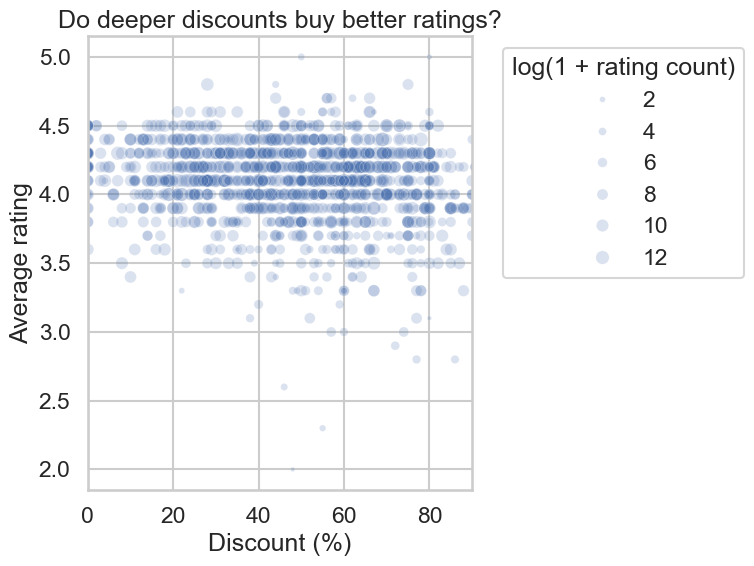

In [107]:
# Scatterplot of Discount vs Average rating
# Question: Do higher discounts lead to better ratings?
# Logging the scale because some products have very few ratings, while others have thousands.
discount_plot = df[['discount_pct', 'rating', 'log_rating_count']].dropna()

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=discount_plot,
    x='discount_pct',
    y='rating',
    size='log_rating_count',
    sizes=(10, 100),
    alpha=0.2,
    ax=ax
)
ax.set_title('Do deeper discounts buy better ratings?')
ax.set_xlabel('Discount (%)')
ax.set_ylabel('Average rating')
ax.set_xlim(0, min(100, np.nanpercentile(discount_plot['discount_pct'], 99.5)))
ax.legend(title='log(1 + rating count)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

/var/folders/h_/64jpn2v13lq3gb3zqqvjrw940000gn/T/ipykernel_3718/750091592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, palette='viridis')


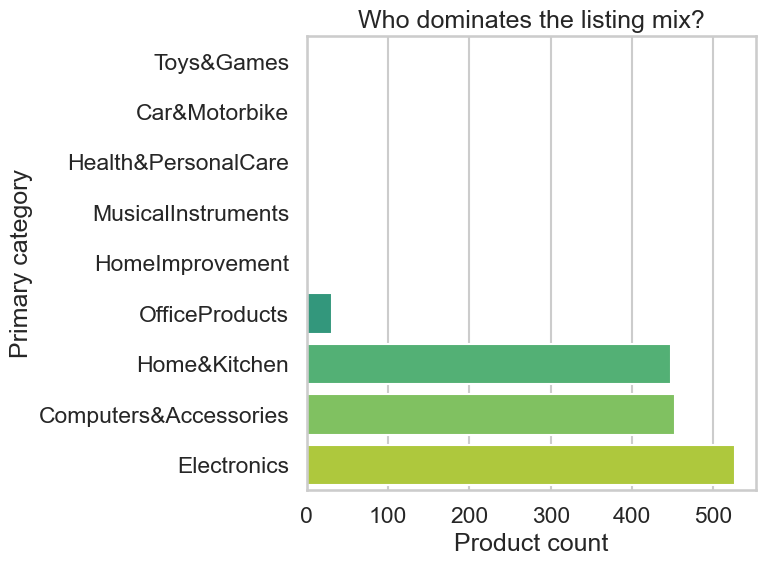

In [108]:
# Barplot of the distribution of product categories
top_categories = df['primary_category'].value_counts().head(10).sort_values()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax, palette='viridis')
ax.set_title('Who dominates the listing mix?')
ax.set_xlabel('Product count')
ax.set_ylabel('Primary category')
plt.tight_layout()

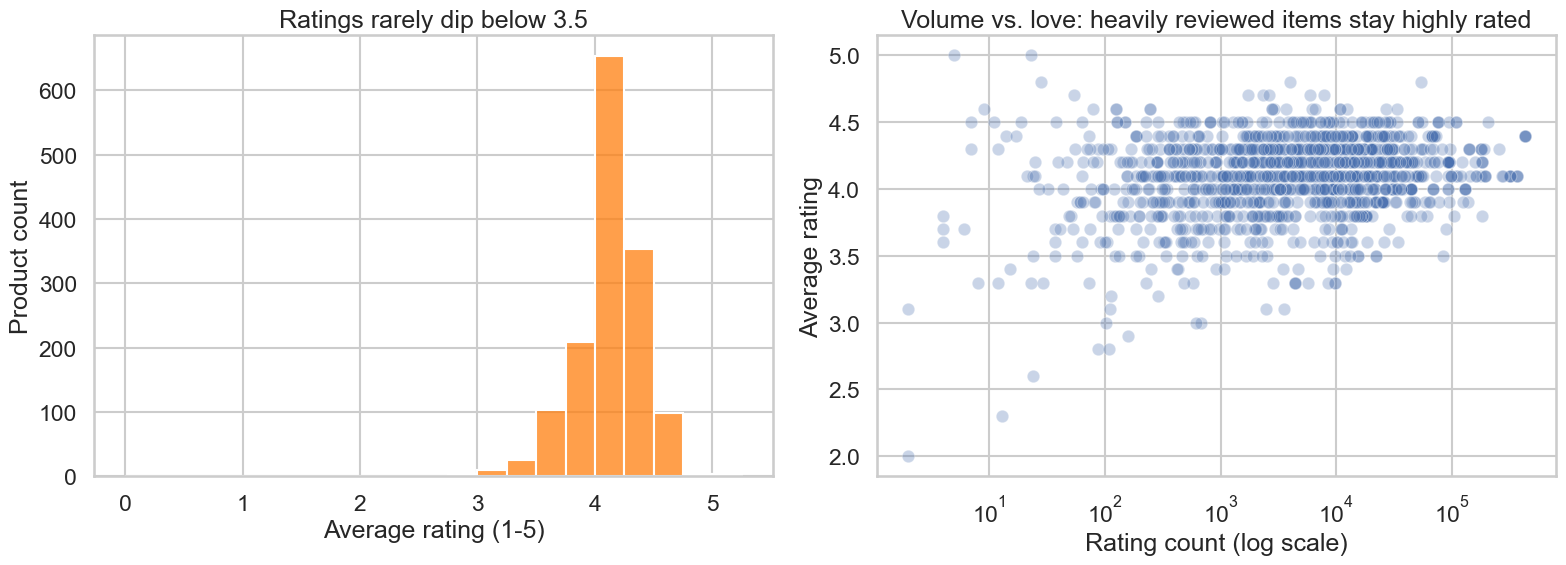

In [109]:
# Ratings distribution and engagement
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of distributions of ratings
sns.histplot(
    data=df,
    x='rating',
    bins=np.arange(0, 5.5, 0.25),
    ax=axes[0],
    color='#ff7f0e'
)
axes[0].set_title('Ratings rarely dip below 3.5')
axes[0].set_xlabel('Average rating (1-5)')
axes[0].set_ylabel('Product count')

# Scatterplot of Rating count vs Average rating
engagement_df = df.loc[df['rating_count'] > 0, ['rating_count', 'rating']].dropna()
sns.scatterplot(
    data=engagement_df,
    x='rating_count',
    y='rating',
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_xscale('log')
axes[1].set_xlabel('Rating count (log scale)')
axes[1].set_ylabel('Average rating')
axes[1].set_title('Volume vs. love: heavily reviewed items stay highly rated')

plt.tight_layout()

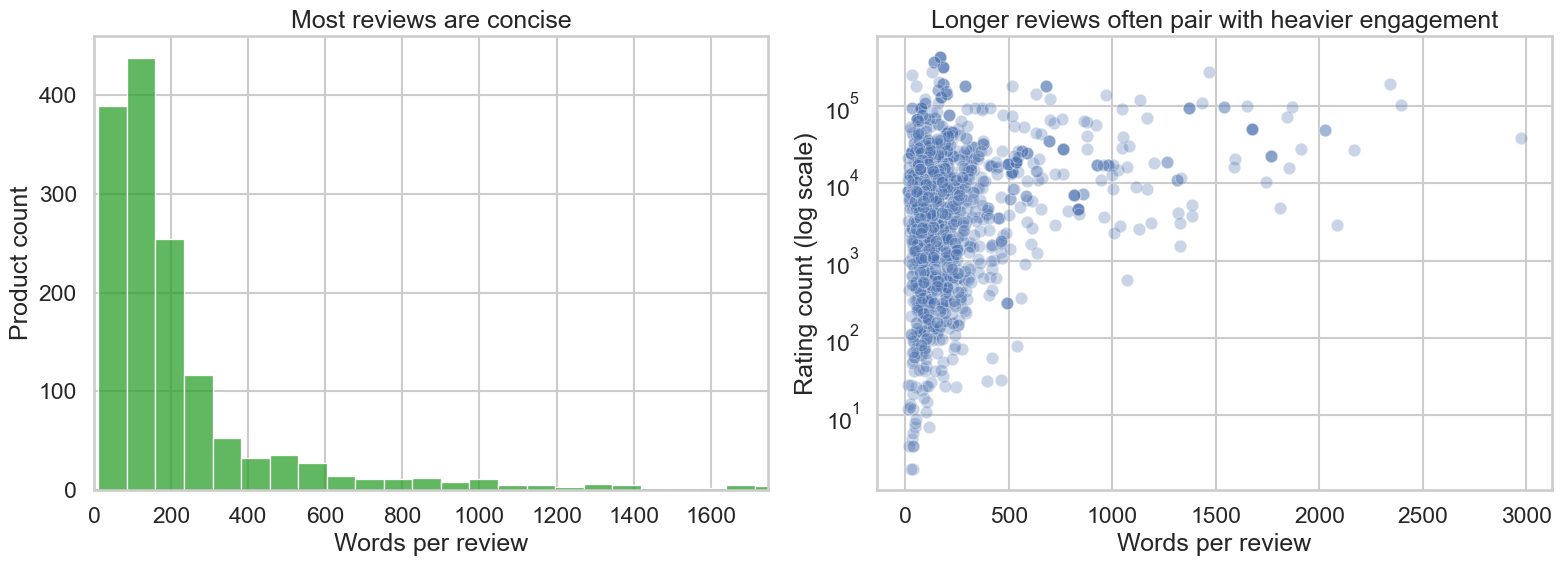

In [110]:
# Customer review details and engagement
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of length of reviews (by word count)
sns.histplot(
    data=df,
    x='review_word_count',
    bins=40,
    ax=axes[0],
    color='#2ca02c'
)
axes[0].set_title('Most reviews are concise')
axes[0].set_xlabel('Words per review')
axes[0].set_ylabel('Product count')
axes[0].set_xlim(0, np.nanpercentile(df['review_word_count'], 99))

# Scatter plot of review length vs engagement (by rating count)
text_vs_engagement = df[['review_word_count', 'rating_count']].dropna()
sns.scatterplot(
    data=text_vs_engagement,
    x='review_word_count',
    y='rating_count',
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_yscale('log')
axes[1].set_title('Longer reviews often pair with heavier engagement')
axes[1].set_xlabel('Words per review')
axes[1].set_ylabel('Rating count (log scale)')

plt.tight_layout()

## Model Building
Trained and evaluated baseline and Random Forest models to predict product ratings using features like price, discount percentage, review volume, and text sentiment.

RF MAE: 0.160
RF R²: 0.287


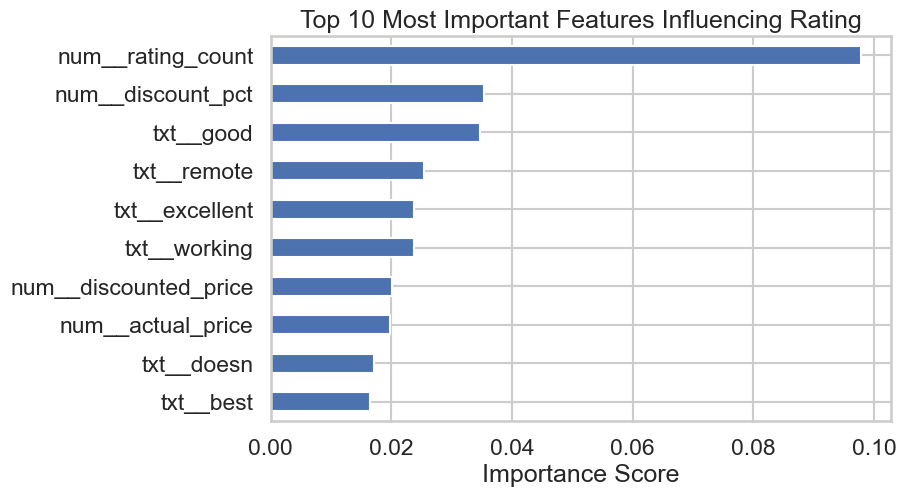

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Use Random Forest Regression Model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"RF MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"RF R²: {r2_score(y_test, y_pred_rf):.3f}")

# Get feature importances
importances = rf_model.named_steps['regressor'].feature_importances_
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# View top 10 features that influence rating
feature_importance.head(10).plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Most Important Features Influencing Rating')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


## Results Summary
The model shows that customer sentiment and engagement are more predictive of overall product ratings than pricing variables. The frequency of positive words like “good” and “excellent” strongly correlates with higher ratings, while negative words such as “doesn’t” lower them. Additionally, deeper discounts and higher review counts are linked to small boosts in rating, suggesting that social proof and perceived value influence consumer perception more than price itself.

The model achieves an R² of 0.29 which explains about a third of rating variation and highlights the emotional and social dimensions of consumer decision-making. The MAE suggest that predictions are on average 0.16 stars off, which is pretty good for a 1-5 rating scale.